In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
student_info = pd.read_csv("../data/studentInfo.csv")

In [87]:
print ("Shape of studentInfo dataset", student_info.shape)
student_info.head()

Shape of studentInfo dataset (32593, 12)


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [88]:
print("Columns in dataset:")
print(student_info.columns.tolist())

Columns in dataset:
['code_module', 'code_presentation', 'id_student', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result']


In [89]:
print("\nMissing values in each column:")
print(student_info.isnull().sum())


Missing values in each column:
code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64


Looks like only column imd_band has around 1111 missing values

In [90]:
print("\nDistribution of final_result (target):")
print(student_info['final_result'].value_counts())


Distribution of final_result (target):
final_result
Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: count, dtype: int64


/tmp/ipykernel_1361/2618709709.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=student_info, x='final_result', palette = 'Set2')


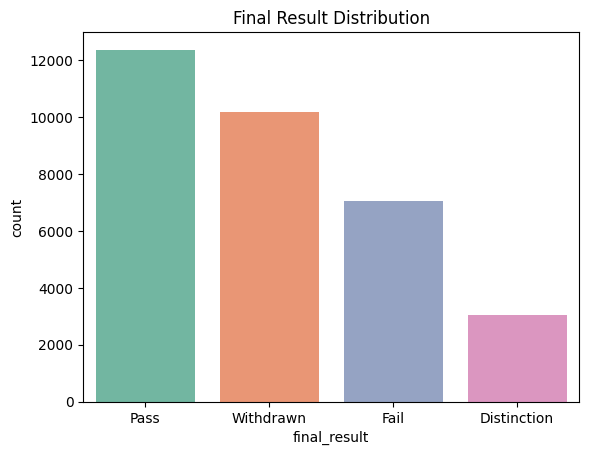

In [91]:
sns.countplot(data=student_info, x='final_result', palette = 'Set2')
plt.title("Final Result Distribution")
plt.show()

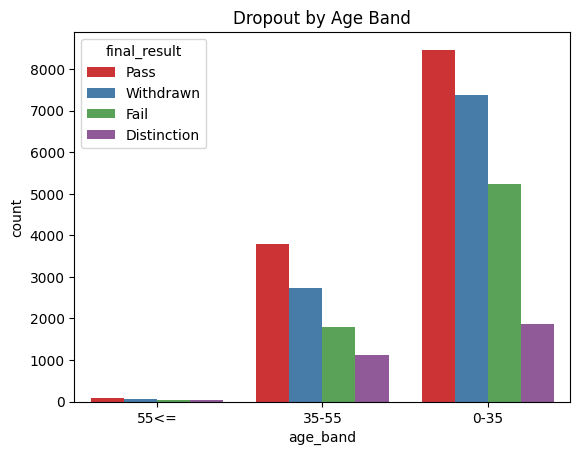

In [92]:
sns.countplot(data=student_info, x="age_band", hue="final_result", palette = 'Set1')
plt.title("Dropout by Age Band")
plt.show()

Younger students are dropping out more compared to older ones

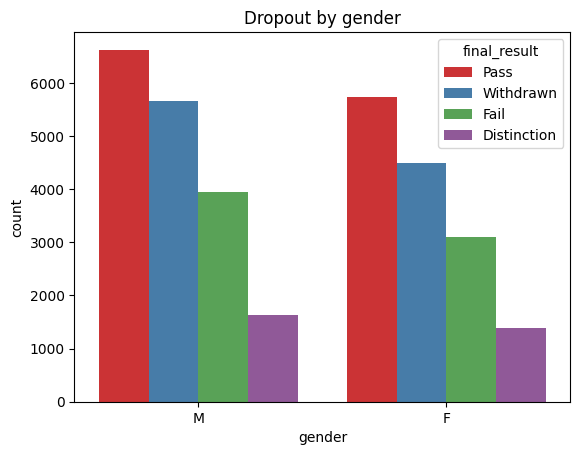

In [93]:
sns.countplot(data=student_info, x="gender", hue='final_result', palette = 'Set1')
plt.title("Dropout by gender")
plt.show()

Compared to female students males students withdrew more. Same can be said for other final results

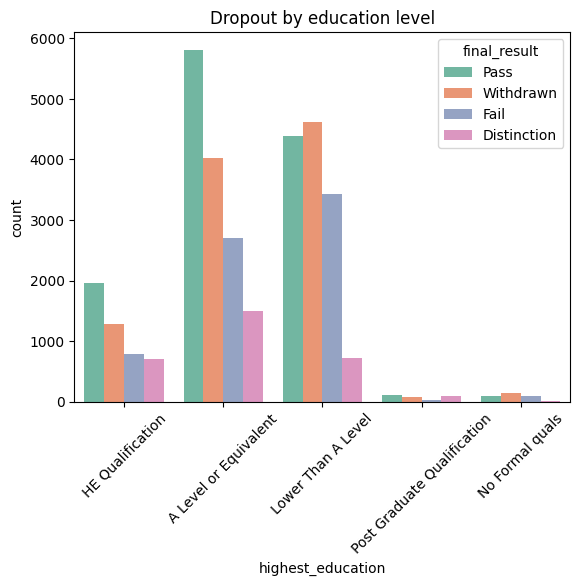

In [94]:
sns.countplot(data=student_info, x="highest_education", hue='final_result', palette = 'Set2')
plt.title("Dropout by education level")
plt.xticks(rotation=45)
plt.show()  

People with A Level or Equivalent education and lower have higher withdrawal rates

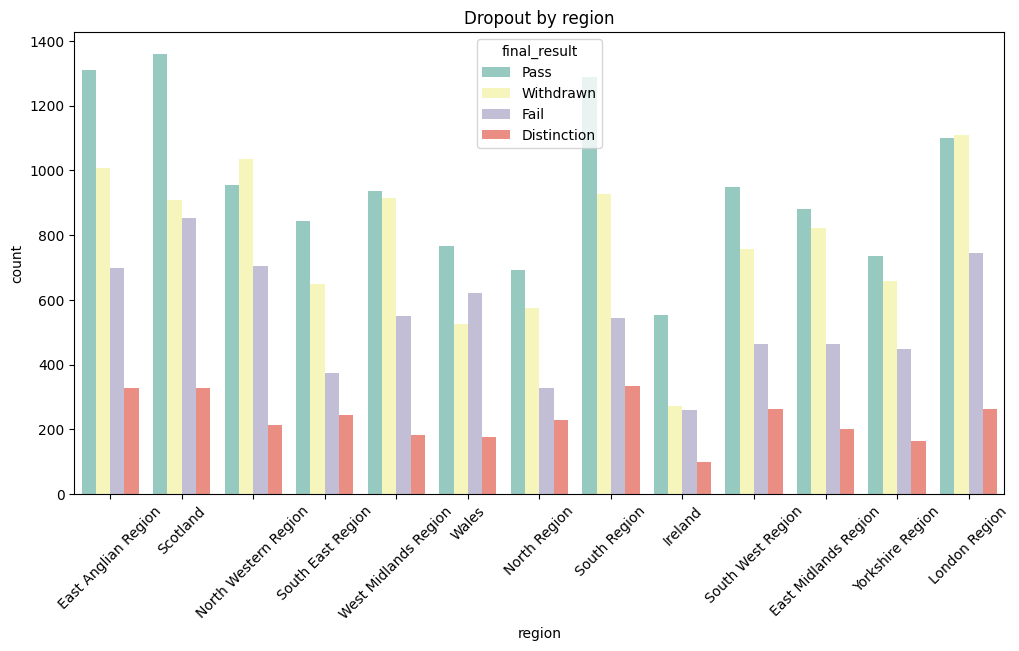

In [95]:
plt.figure(figsize=(12, 6))
sns.countplot(data=student_info, x="region", hue="final_result", palette= 'Set3')
plt.title("Dropout by region")
plt.xticks(rotation=45)
plt.show()

In [96]:
df = student_info[["id_student", "gender", "age_band", "highest_education", "region", "disability", "studied_credits", "num_of_prev_attempts", "final_result"]].copy()

In [97]:
df = student_info[student_info['final_result'].isin(['Pass', 'Fail', 'Withdrawn', "Distinction"])].copy()


In [98]:
df['label'] = df['final_result'].apply(lambda x: 1 if x == 'Withdrawn' else 0)
df.drop(columns=["final_result"], inplace=True)

In [99]:
df_encoded = pd.get_dummies(df, drop_first=True).astype(int)

In [100]:
print("Processed dataset shape:", df_encoded.shape)
df_encoded.head()

Processed dataset shape: (32593, 42)


,id_student,num_of_prev_attempts,studied_credits,label,code_module_BBB,code_module_CCC,code_module_DDD,code_module_EEE,code_module_FFF,code_module_GGG,...,imd_band_30-40%,imd_band_40-50%,imd_band_50-60%,imd_band_60-70%,imd_band_70-80%,imd_band_80-90%,imd_band_90-100%,age_band_35-55,age_band_55<=,disability_Y
0,11391,0,240,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,28400,0,60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,30268,0,60,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
3,31604,0,60,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,32885,0,60,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [102]:
vle = pd.read_csv("../data/studentVle.csv")
vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [103]:
behavior_df = vle.groupby("id_student").agg({"sum_click": ["sum", "mean", "max", "count"], "date": "nunique"})

In [104]:
behavior_df.columns = ["total_clicks", "avg_clicks", "max_clicks", "click_events", "active_days"]
behavior_df.reset_index(inplace=True)

In [105]:
df_final = df_encoded.merge(behavior_df, on="id_student", how="left")
df_final.fillna(0, inplace = True)

In the above steps we merged the student behaviour data (Click Patterns)
We use `studentVle.csv` to extract behavioral features like total clicks, activity days, and average engagement.

In [106]:
df_final.to_pickle('../data/processed_student_data.pkl')  # Save the data to disk, so that it can be accessed by other notebooks